In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [2]:
# df=pd.read_csv("/content/data_csv.csv")
# df

In [3]:
df = pd.read_csv(r"C:\Users\Deniz\Desktop\data\data_csv.csv")
df

,code project,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
1,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
2,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
3,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
4,1,5.0,No way,Freeway,2,12.8,33-70 %,4027500.0
...,...,...,...,...,...,...,...,...
25325,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0
25326,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0
25327,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0
25328,539,5.0,No way,Mainroad,2,12.5,5-33 %,845000.0


In [4]:
df_c=df.drop('code project',axis=1)

In [5]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25330 entries, 0 to 25329
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Length(km)                     25330 non-null  float64
 1   Type of road                   25330 non-null  object 
 2   constructed road Type          25330 non-null  object 
 3   Number Line                    25330 non-null  int64  
 4   width road(m)                  25330 non-null  float64
 5   slope land%                    25330 non-null  object 
 6   Cost Estimation(milion_rials)  25330 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
df_c.isnull().sum()

Length(km)                       0
Type of road                     0
constructed road Type            0
Number Line                      0
width road(m)                    0
slope land%                      0
Cost Estimation(milion_rials)    0
dtype: int64

In [7]:
df_c.describe()

,Length(km),Number Line,width road(m),Cost Estimation(milion_rials)
count,25330.000000,25330.000000,25330.000000,2.533000e+04
mean,4.020994,1.259297,8.398423,5.865425e+05
std,1.431346,0.516036,2.920223,6.837286e+05
min,0.000107,0.000000,0.300000,5.882604e+00
25%,3.598371,1.000000,6.550000,2.623322e+05
50%,4.791322,1.000000,7.400000,4.192029e+05
75%,4.995176,2.000000,10.900000,6.495175e+05
max,5.000000,3.000000,17.150000,8.752500e+06


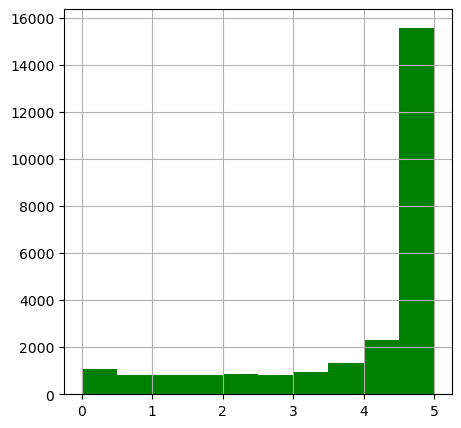

In [8]:
df_c['Length(km)'].hist(figsize=(5,5),xlabelsize=(10),color = 'green')
plt.show()

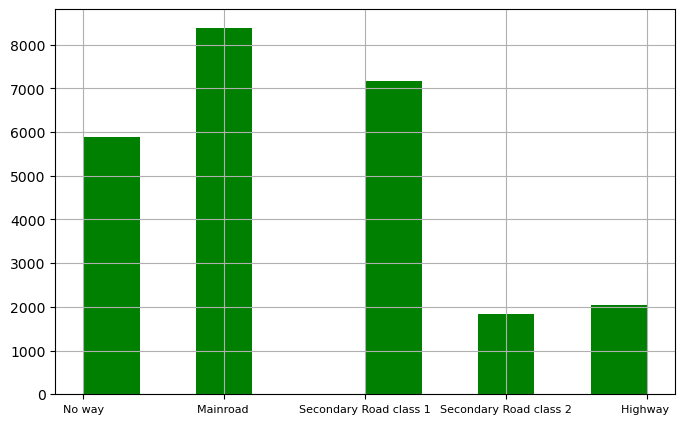

In [9]:
df_c['Type of road'].hist(figsize=(8,5),xlabelsize=(8),color = 'green')
plt.show()

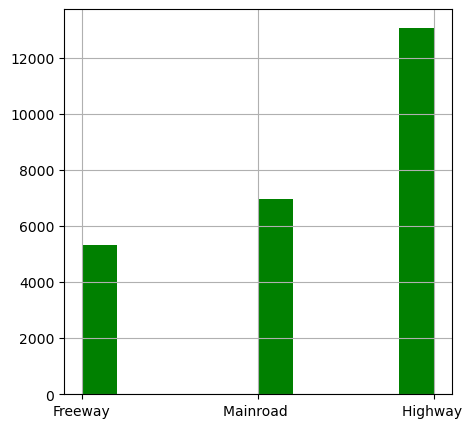

In [10]:
df_c['constructed road Type'].hist(figsize=(5,5),color = 'green')
plt.show()

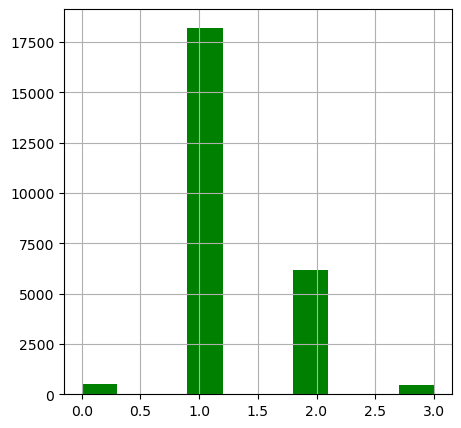

In [11]:
df_c["Number Line"].hist(figsize=(5,5),color = 'green')
plt.show()

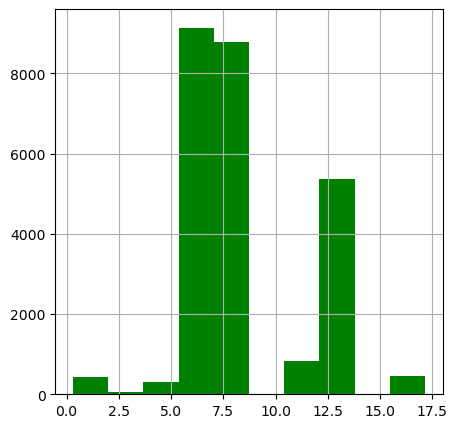

In [12]:
df_c["width road(m)"].hist(figsize=(5,5),color = 'green')
plt.show()

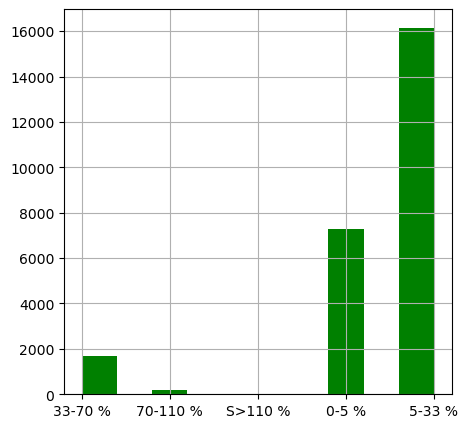

In [13]:
df_c["slope land%"].hist(figsize=(5,5),color = 'green')
plt.show()

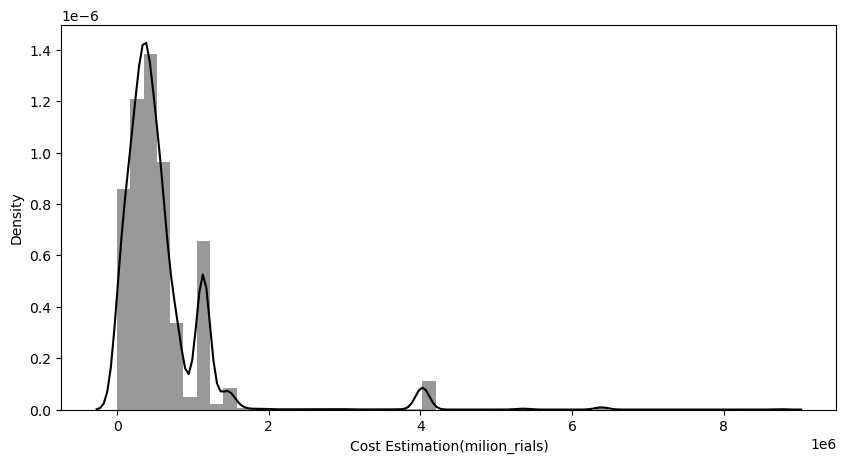

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(df_c['Cost Estimation(milion_rials)'], color='black');

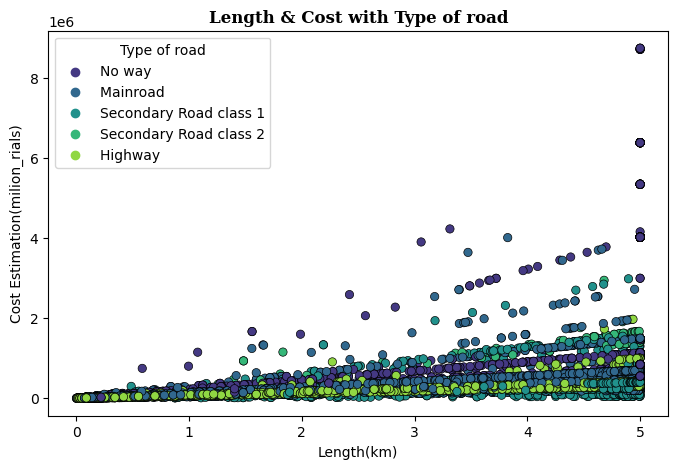

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c["Type of road"] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with Type of road' , fontfamily='Serif' , fontweight='bold');

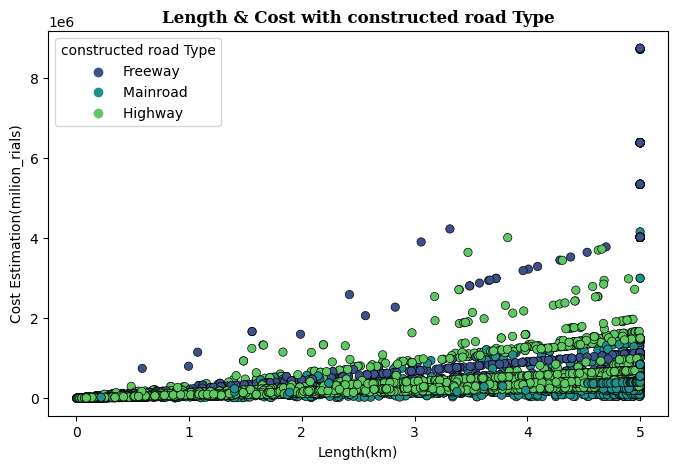

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['constructed road Type'] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with constructed road Type' , fontfamily='Serif' , fontweight='bold');

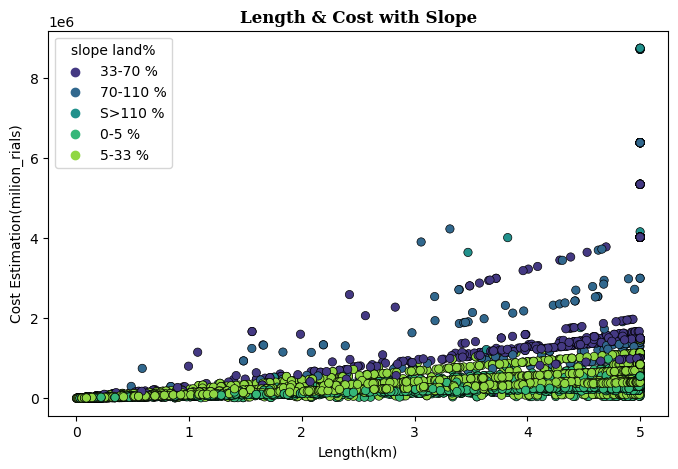

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['Length(km)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['slope land%'] ,
                palette='viridis' , ec='k');
plt.title('Length & Cost with Slope' , fontfamily='Serif' , fontweight='bold');

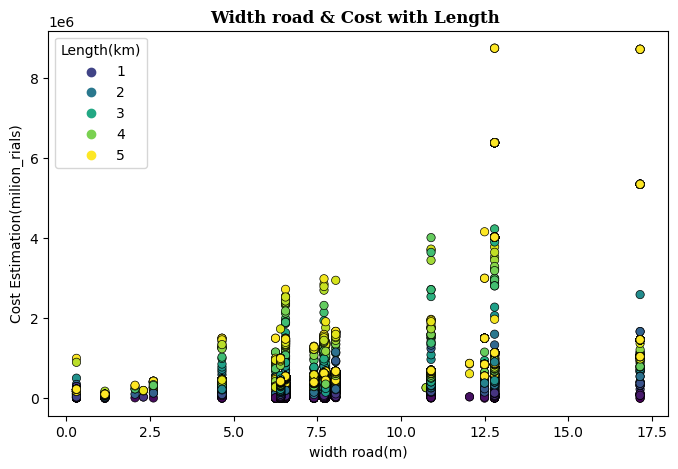

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_c['width road(m)'] , y=df_c['Cost Estimation(milion_rials)'] , hue=df_c['Length(km)'] ,
                palette='viridis' , ec='k');
plt.title('Width road & Cost with Length ' , fontfamily='Serif' , fontweight='bold');

<Figure size 2000x2000 with 0 Axes>

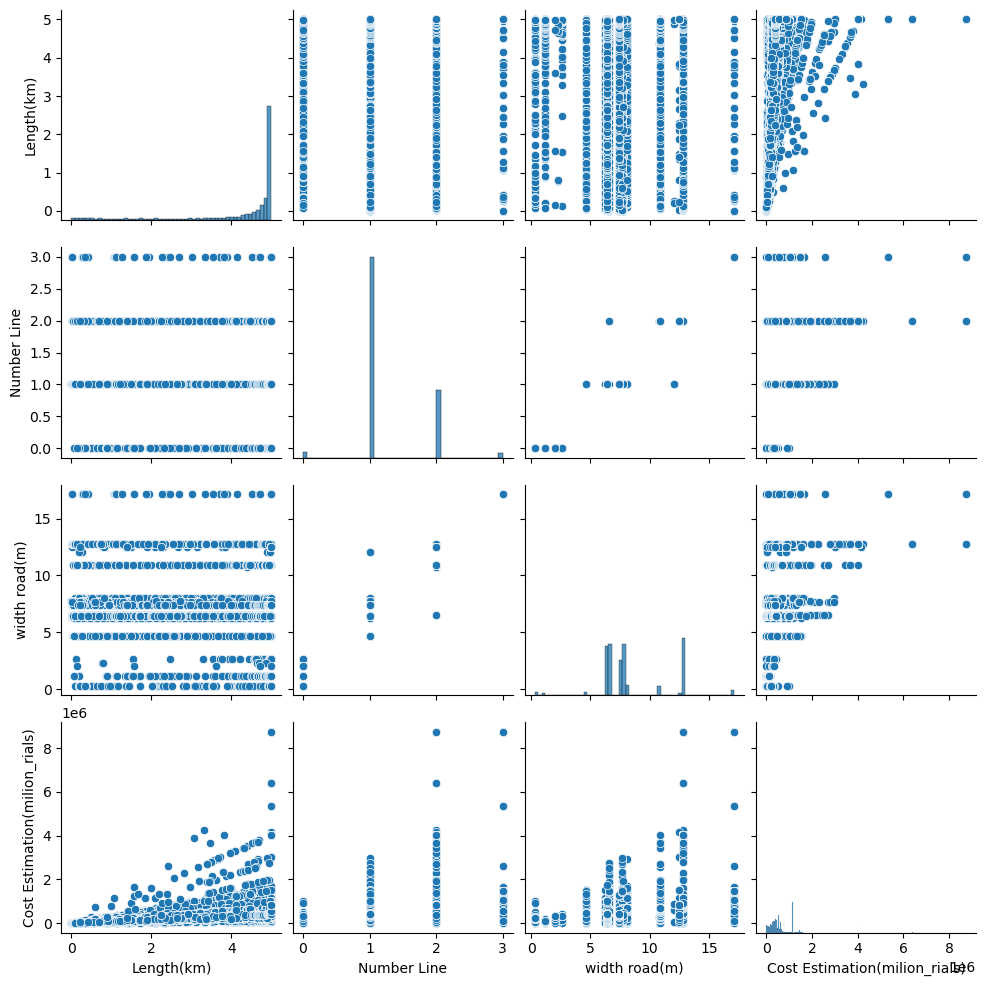

In [19]:
plt.figure(figsize=(20,20))
sns.pairplot(df_c)


In [20]:
df_c=df_c.drop_duplicates(subset="Cost Estimation(milion_rials)")
df_c

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,5.000000,No way,Freeway,2,12.80,33-70 %,4.027500e+06
21,5.000000,No way,Freeway,3,17.15,33-70 %,5.351250e+06
31,5.000000,No way,Freeway,3,17.15,70-110 %,8.726250e+06
32,5.000000,No way,Mainroad,1,6.25,33-70 %,7.500000e+05
37,0.993974,No way,Freeway,2,12.80,33-70 %,8.006457e+05
...,...,...,...,...,...,...,...
25289,4.989205,Secondary Road class 1,Mainroad,1,7.40,5-33 %,3.991364e+05
25291,0.218490,No way,Mainroad,2,12.50,0-5 %,2.414313e+04
25292,1.401865,No way,Mainroad,2,12.50,0-5 %,1.549060e+05
25299,1.401865,No way,Mainroad,2,12.50,5-33 %,2.369151e+05


In [21]:
categorical_features_indices =df_c.select_dtypes(include=["object"]).columns.tolist()

In [22]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
liNum=['Length(km)','width road(m)']
df_c[liNum]=sc.fit_transform(df_c[liNum])

df_c

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%,Cost Estimation(milion_rials)
0,0.785386,No way,Freeway,2,3.142534,33-70 %,4.027500e+06
21,0.785386,No way,Freeway,3,5.582537,33-70 %,5.351250e+06
31,0.785386,No way,Freeway,3,5.582537,70-110 %,8.726250e+06
32,0.785386,No way,Mainroad,1,-0.531495,33-70 %,7.500000e+05
37,-1.988066,No way,Freeway,2,3.142534,33-70 %,8.006457e+05
...,...,...,...,...,...,...,...
25289,0.777913,Secondary Road class 1,Mainroad,1,0.113564,5-33 %,3.991364e+05
25291,-2.524949,No way,Mainroad,2,2.974258,0-5 %,2.414313e+04
25292,-1.705675,No way,Mainroad,2,2.974258,0-5 %,1.549060e+05
25299,-1.705675,No way,Mainroad,2,2.974258,5-33 %,2.369151e+05


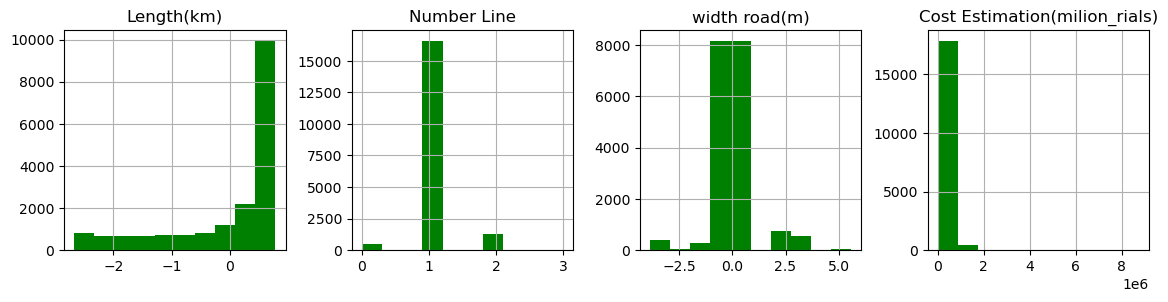

In [23]:
df_c.hist(figsize = (14,14), layout = (4,4), color = "green")
plt.show()

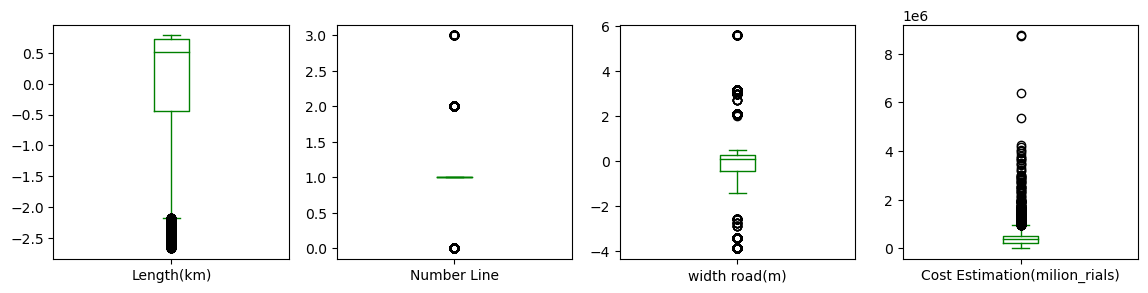

In [24]:
df_c.plot(kind='box',subplots=True,figsize = (14,14), layout = (4,4), color = "green")
plt.show()

In [25]:
Y = df_c['Cost Estimation(milion_rials)']

X = df_c.drop('Cost Estimation(milion_rials)',axis=1)
X.shape

(18395, 6)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

sc_Y = StandardScaler()
Y_c = sc_Y.fit_transform(np.array(Y).reshape(-1 , 1))
Y_c

array([[12.76723685],
       [17.41293663],
       [29.25749698],
       ...,
       [-0.82362915],
       [-0.53581833],
       [-0.03942739]])

# Split data

In [27]:
#validation

from sklearn.model_selection import train_test_split

X_train,X_rest,Y_train,Y_rest=train_test_split(X,Y_c,test_size=0.3,
                                               random_state=42)

X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

In [28]:
X_test.shape

(2760, 6)

In [29]:
X_test

,Length(km),Type of road,constructed road Type,Number Line,width road(m),slope land%
4257,-1.669017,Mainroad,Highway,1,-0.363218,5-33 %
13244,-0.711779,Mainroad,Highway,1,-0.363218,5-33 %
10908,-2.306526,Mainroad,Highway,1,-0.363218,0-5 %
12392,0.785044,Secondary Road class 2,Highway,1,0.478162,0-5 %
18269,-2.471145,Secondary Road class 1,Highway,1,0.281840,5-33 %
...,...,...,...,...,...,...
2377,0.760703,Mainroad,Highway,1,-0.363218,5-33 %
1347,0.502428,Mainroad,Highway,0,-3.868971,5-33 %
13095,-2.529135,Mainroad,Mainroad,1,-0.531495,0-5 %
10331,-2.267079,Mainroad,Mainroad,1,-0.531495,5-33 %


In [30]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("Training Result")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("Testing Result")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [31]:
!pip install catboost
# !pip install xgboost

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

# CatBoost Model


In [33]:

model_CBR = CatBoostRegressor(cat_features=categorical_features_indices, verbose=0 ,eval_metric='RMSE')

# تعیین گرید پارامترها
param_grid =  {'depth'  : range(1,15),
                  'learning_rate' : [0.01, 0.05, 0.1,0.001],
                  'iterations'    : range(100,1000,50) }
# ایجاد جستجوی گرید
grid_search = GridSearchCV(estimator=model_CBR, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# آموزش جستجوی گرید با داده‌های آموزشی
grid_search.fit(X_train, Y_train)

# بهترین مدل
best_model = grid_search.best_estimator_

# مقادیر بهترین پارامترها
best_params = grid_search.best_params_

# ارزیابی مدل
accuracy = best_model.score(X_val, Y_val)

# چاپ بهترین پارامترها و دقت مدل
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

In [34]:

from catboost import CatBoostRegressor

# تعریف مدل CatBoostRegressor
cb_model = CatBoostRegressor(iterations=950,
                             learning_rate=0.1,
                             depth=4,
                             eval_metric='RMSE')


# آموزش مدل
cb_model.fit(X_train, Y_train, cat_features=categorical_features_indices, verbose=False)


In [35]:
# ارزیابی دقت و خطا مدل
y_train_pred = cb_model.predict(X_train)
y_test_pred = cb_model.predict(X_test)


print_evaluate(Y_train, y_train_pred, train=True)
print_evaluate(Y_test, y_test_pred, train=False)


Training Result
MAE:  0.015717739200816892
MSE:  0.004785491290619323
RMSE:  0.06917724546857386
R2 Square:  0.9953037452290349
Testing Result
MAE:  0.017713040283337783
MSE:  0.004615764676102274
RMSE:  0.06793941916223802
R2 Square:  0.9953184028234229


In [36]:
y_predict_test =pd.DataFrame(y_test_pred)
y_predict_train =pd.DataFrame(y_train_pred)
y_test = pd.DataFrame(Y_test)
y_train = pd.DataFrame(Y_train)
y_test

,0
0,-0.805649
1,-0.271883
2,-1.226720
3,0.211847
4,-1.237330
...,...
2755,0.549189
2756,-0.642181
2757,-1.337449
2758,-1.242833


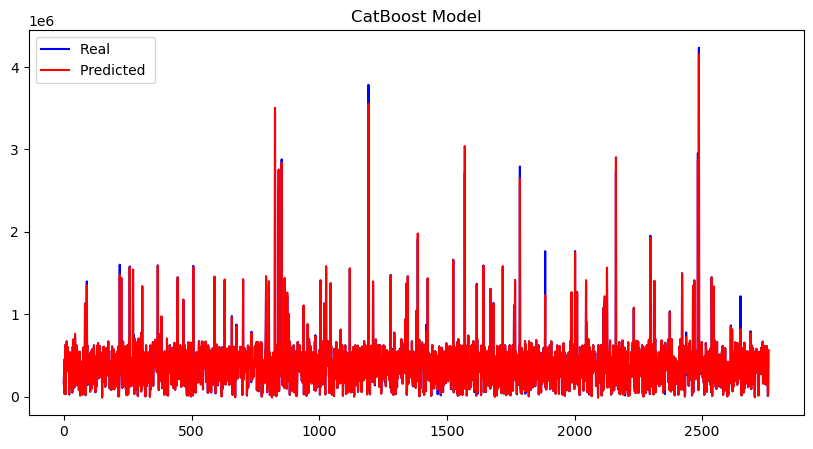

In [37]:
inv_y_test=sc_Y.inverse_transform(y_test)
inv_y_test_pred=sc_Y.inverse_transform(y_predict_test)
inv_y_train=sc_Y.inverse_transform(y_train)
inv_y_train_pred=sc_Y.inverse_transform(y_predict_train)

fig = plt.figure(figsize = (10,5))
plt.plot(inv_y_test, color='b', label='Real ')
plt.plot(inv_y_test_pred, color='r', label='Predicted ')
plt.legend()
plt.title("CatBoost Model")
plt.show()

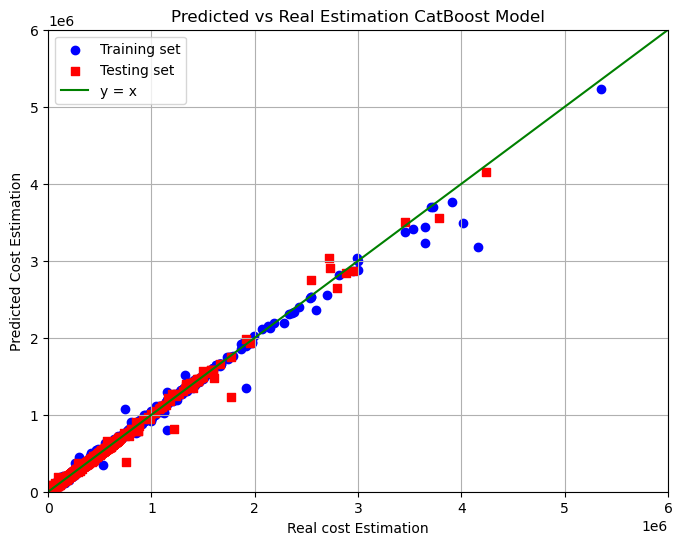

In [38]:
# ایجاد نمودار
plt.figure(figsize=(8, 6))

# داده‌های آموزش
plt.scatter(inv_y_train,inv_y_train_pred , color='blue', label='Training set', marker='o')

# داده‌های تست
plt.scatter(inv_y_test,inv_y_test_pred, color='red', label='Testing set', marker='s')

# خط y = x
x = np.linspace(min(Y), max(Y), 100)
plt.plot(x, x, color='green', label='y = x')

# تنظیمات نمودار
plt.xlabel('Real cost Estimation')
plt.ylabel('Predicted Cost Estimation')
plt.legend()
plt.grid(True)
plt.xlim(0, 6000000)
plt.ylim(0,6000000 )
plt.title('Predicted vs Real Estimation CatBoost Model')

# نمایش نمودار
plt.show()


# SHAP Value

In [39]:
pip install shap

In [40]:
from catboost import Pool, CatBoostRegressor
import shap
shap.initjs()

In [41]:
# استفاده از نمونه تصادفی از دیتافریم برای محاسبه سریع‌تر
X_sampled_train = shap.sample(X_train, nsamples=1500, random_state=50)
X_sampled_test = shap.sample(X_test, nsamples=1000, random_state=10)

# ایجاد توضیح‌گر با پارامتر صحیح
explainer = shap.TreeExplainer(cb_model, feature_perturbation="tree_path_dependent")

# محاسبه SHAP values
shap_values = explainer.shap_values(X_sampled_test)

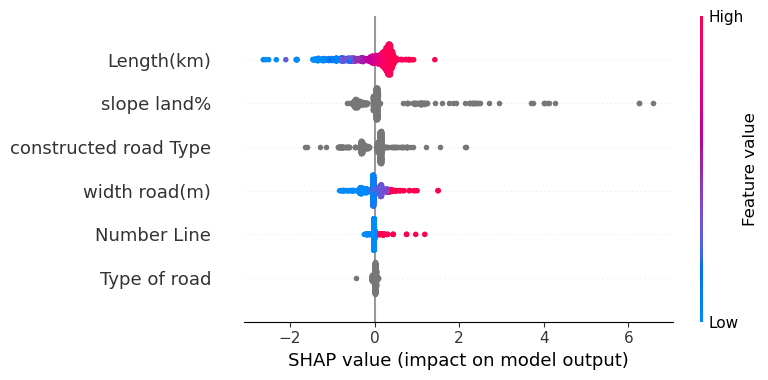

In [42]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_sampled_test)


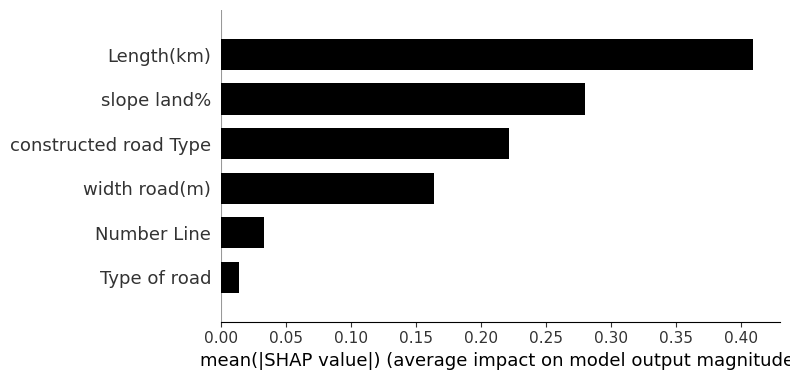

In [43]:
shap.summary_plot(shap_values, X_sampled_test, plot_type="bar" , color="black")

In [44]:
shap.force_plot(explainer.expected_value, shap_values[63,:], X_sampled_test.iloc[63,:], figsize=(5, 5))

In [45]:
shap.force_plot(explainer.expected_value, shap_values[745,:], X_sampled_test.iloc[745,:], figsize=(5, 5))

In [46]:
shap.force_plot(explainer.expected_value, shap_values[776,:], X_sampled_test.iloc[776,:], figsize=(5, 5))